In [1]:
#Importando as bibliotecas necessárias
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

In [2]:
pib=pd.read_excel('gdp_per_year.xlsx') #PIB em dolares com inflacao ajustada 
agri_porc = pd.read_excel('AgriculturepforGDP.xlsx') #Porcentagem do PIB que corresponde à agricultura
hightech_export = pd.read_excel('high_tech_export.xlsx') #Porcentagem da comercialização de bens de manofatura que corresponde a bens hightech
education = pd.read_excel('education.xlsx') #Porcentagem de gasto por estudante do PIBpercapta
democracia=pd.read_excel('democracia.xlsx') #índice da qualidade da democracia por país
populacao=pd.read_excel('population_total.xlsx')
land_agri=pd.read_excel("agricultural_land_percent_of_land_area.xlsx")

In [3]:
pib_idx = pib.set_index('Country')
agri_idx = agri_porc.set_index("Country")
hightech_idx = hightech_export.set_index('Country')
education_idx = education.set_index("Country")
democracia_idx = democracia.set_index("Country")
populacao_idx= populacao.set_index("Country")
land_agri_idx = land_agri.set_index("country")


In [4]:
#Criando a coluna BRICS 
pib_idx["BRICS"] = 0
agri_idx["BRICS"] = 0
hightech_idx["BRICS"] = 0
education_idx["BRICS"] = 0
democracia_idx["BRICS"] = 0
populacao_idx["BRICS"] = 0


#Criando o grupo que irá se repetir
brics =["Brazil", "China","India","South Africa", "Russia"]
#Mudando a coluna dos membros dos BRICS
pib_idx.loc[brics, "BRICS" ] = 1
agri_idx.loc[brics, "BRICS" ] = 1
hightech_idx.loc[brics, "BRICS" ] = 1
education_idx.loc[brics, "BRICS" ] = 1
democracia_idx.loc[brics, "BRICS" ] = 1
populacao_idx.loc[brics, "BRICS" ] = 1



#democracia_idx.loc[democracia_idx["BRICS"] == 1]  teste

#Criando a coluna OCDE

pib_idx["OCDE"]=0
agri_idx["OCDE"] = 0
hightech_idx["OCDE"] = 0
education_idx["OCDE"] = 0
democracia_idx["OCDE"] = 0
populacao_idx["OCDE"] = 0
land_agri_idx["OCDE"] = 0
#Criando o grupo que irá se repetir
ocde = [ "United States","United Kingdom", "Turkey", "Switzerland", "Sweden", "Spain", "Slovenia", "Slovak Republic", "Portugal", "Poland", "Norway", "New Zealand","Netherlands", "Mexico", "Luxembourg", "Lithuania", "Latvia", "Japan", "Italy", "Israel", "Ireland", "Iceland", "Hungary", "Greece", "Germany", "France", "Finland", "Estonia", "Denmark", "Czech Rep.", "Chile", "Canada", "Belgium", "Austria", "Australia"]
#Mudando a coluna dos membros da OCDE 
pib_idx.loc[ocde,"OCDE"]=1
agri_idx.loc[ocde, "OCDE" ] = 1
hightech_idx.loc[ocde, "OCDE" ] = 1
education_idx.loc[ocde, "OCDE" ] = 1
democracia_idx.loc[ocde, "OCDE" ] = 1
populacao_idx.loc[ocde, "OCDE" ] = 1



#pib_idx.loc[pib_idx.OCDE==1] teste

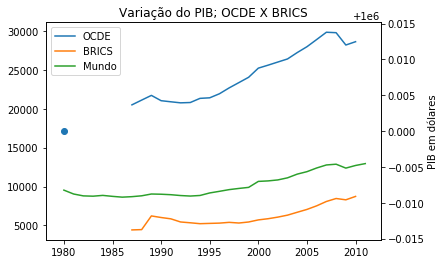

In [5]:
#Como foi a variação do PIB de 1987 até 2011 (ano mais recente do DataFrame)

#Criando variação de tempo desejada
anos = np.arange(1987, 2011, 1)

#Criando variável que contém a média dos PIBS a cada ano
pib_ocde = pib_idx.loc[pib_idx.OCDE ==1].loc[:, anos]

pib_brics =pib_idx.loc[pib_idx.BRICS==1].loc[:,anos]

#Plotando o gráfico

fig, ax1 = plt.subplots()

#ax1.subplot(111)
ax1.plot(pib_ocde.mean(), label="OCDE")
ax1.plot(pib_brics.mean(),label="BRICS")
ax1.plot(pib.mean(), label="Mundo")
ax1.legend()

ax2 = ax1.twinx()

ax2.scatter(1980, 1000000)

plt.ylabel("PIB em dólares")
plt.xlabel("Ano")
plt.title("Variação do PIB; OCDE X BRICS")
plt.show()

In [6]:
#Comparação tech e porcentagem pib

tech_mundi11 = hightech_idx.loc[:,:].mean().mean()
tech_ocde11 = hightech_idx.loc[hightech_idx.OCDE==1].loc[:,:].mean().mean()
tech_brics11 = hightech_idx.loc[hightech_idx.BRICS==1].loc[:,:].mean().mean()




#tech_mundi10 = float(tech_mundi11)
#tech_ocde10 = float(tech_ocde11)
#tech_brics10 = float(tech_brics11)

#hightech_idx.loc[hightech_idx.BRICS==1]

hightech_idx.loc[hightech_idx.OCDE==1]

hightech_idx[hightech_idx.OCDE==1].mean().mean()
#hightech_idx.loc[:, hightech_idx.columns != "OCDE"]
hightech_idx.loc[ocde, hightech_idx.columns != "OCDE"]

hightech_limpo=hightech_idx.drop(['OCDE', 'BRICS'],  axis=1) #tirando coluna BRICS e OCDE para não contaminar a média
#hightech_limpo.loc[hightech_idx.OCDE==1,:].mean().mean()
#hightech_limpo.loc[hightech_idx.BRICS==1,:].mean().mean()
#hightech_limpo.loc[:,:].mean().mean()

agri_limpo=agri_idx.drop(['OCDE', 'BRICS'],  axis=1)
#agri_limpo.loc[agri_idx.OCDE==1,:].mean().mean()
#agri_limpo.loc[:,:].mean().mean()
#agri_limpo.loc[agri_idx.BRICS==1,:].mean().mean()



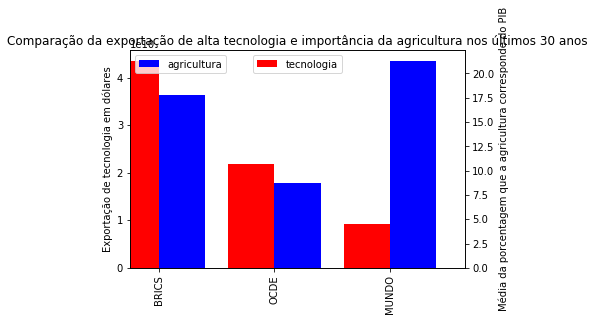

In [7]:

from io import StringIO
s = StringIO("""     tech     agri
BRICS     43545235000.0   17.78
OCDE     21826341385.59   8.69
MUNDO     9296541598.08   21.31""")

df = pd.read_csv(s, index_col=0, delimiter=' ', skipinitialspace=True)

fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.4

df.tech.plot(kind='bar', color='red', label="tecnologia", ax=ax, width=width, position=1)
df.agri.plot(kind='bar', color='blue',label="agricultura",ax=ax2, width=width, position=0)
plt.title("Comparação da exportação de alta tecnologia e importância da agricultura nos últimos 30 anos")

ax.legend()
ax.legend(loc="upper center")
ax2.legend()



ax.set_ylabel('Exportação de tecnologia em dólares')
ax2.set_ylabel('Média da porcentagem que a agricultura corresponde do PIB')
ttl = ax.title
ttl.set_position([.5, 1.85])


plt.show()

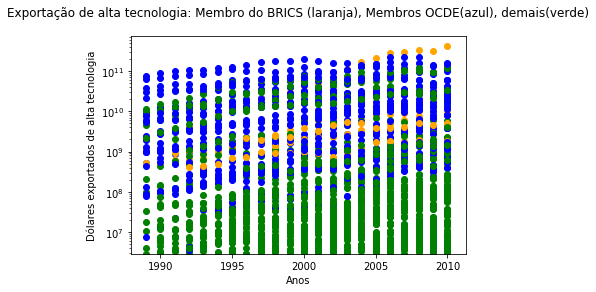

In [8]:

    
anos1 = np.arange(1989, 2011, 1)

for ano in anos1:
    for pais in hightech_idx.index:

        if pais in ocde:
            plt.scatter(ano, hightech_idx.loc[pais, ano], color="blue")

        if pais in brics:
            plt.scatter(ano, hightech_idx.loc[pais, ano], color="orange")
            

        if pais not in brics:
            if pais not in ocde:
                plt.scatter(ano, hightech_idx.loc[pais, ano], color="green")


                
plt.xlabel("Anos")
plt.ylabel("Dólares exportados de alta tecnologia")
plt.title("Exportação de alta tecnologia: Membro do BRICS (laranja), Membros OCDE(azul), demais(verde)", pad=20)
plt.yscale('log')
plt.show()

#hightech_idx.plot.scatter(x=anos1, y=hightech_idx.columns)



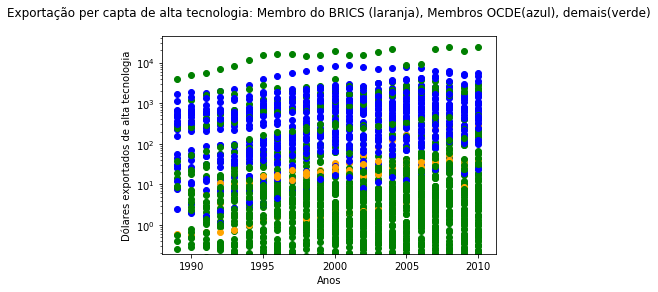

In [9]:
anos1 = np.arange(1989, 2011, 1)
ocde = [ "United States","United Kingdom", "Turkey", "Switzerland", "Sweden", "Spain", "Slovenia", "Slovak Republic", "Portugal", "Poland", "Norway", "New Zealand","Netherlands", "Mexico", "Luxembourg", "Lithuania", "Latvia", "Japan", "Italy", "Israel", "Ireland", "Iceland", "Hungary", "Greece", "Germany", "France", "Finland", "Estonia", "Denmark", "Czech Rep.", "Chile", "Canada", "Belgium", "Austria", "Australia"]
brics =["Brazil", "China","India","South Africa", "Russia"]

for ano in anos1:
    for pais in hightech_idx.index:
        if pais in populacao_idx.index:
            
            if pais in ocde:
                plt.scatter(ano, (hightech_idx.loc[pais, ano] / populacao_idx.loc[pais,ano]), color="blue")

            if pais in brics:
                plt.scatter(ano, (hightech_idx.loc[pais, ano] / populacao_idx.loc[pais,ano]), color="orange")
                
                    

            if pais not in ocde:
                if pais not in brics:
                    plt.scatter(ano, (hightech_idx.loc[pais, ano] / populacao_idx.loc[pais,ano]), color="green")
                    
            
            

             
plt.xlabel("Anos")
plt.ylabel("Dólares exportados de alta tecnologia")
plt.title("Exportação per capta de alta tecnologia: Membro do BRICS (laranja), Membros OCDE(azul), demais(verde)", pad=20)
plt.yscale('log')

plt.show()


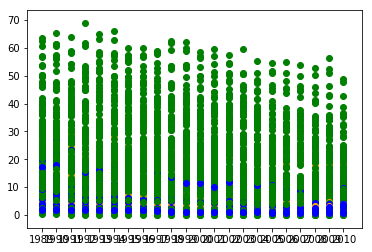

In [10]:

years=["1989", "1990", "1991", "1992", "1993", "1994", "1995", "1996", "1997", "1998", "1999", "2000","2001", "2002", "2003", "2004", "2005", "2006", "2007", "2008", "2009", "2010"]
for ano in years:
    for pais in agri_idx.index:

        if pais in ocde:
            plt.scatter(ano, agri_idx.loc[pais, ano], color="blue")

        if pais in brics:
            plt.scatter(ano, agri_idx.loc[pais, ano], color="orange")
            

        if pais not in brics:
            if pais not in ocde:
                plt.scatter(ano, agri_idx.loc[pais, ano], color="green")


                


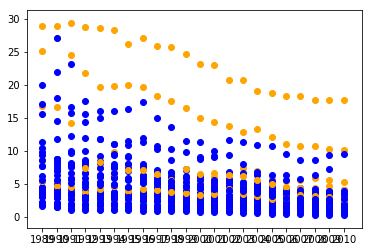

In [11]:
years=["1989", "1990", "1991", "1992", "1993", "1994", "1995", "1996", "1997", "1998", "1999", "2000","2001", "2002", "2003", "2004", "2005", "2006", "2007", "2008", "2009", "2010"]
for ano in years:
    for pais in agri_idx.index:

        if pais in ocde:
            plt.scatter(ano, agri_idx.loc[pais, ano], color="blue")

        if pais in brics:
            plt.scatter(ano, agri_idx.loc[pais, ano], color="orange")


KeyboardInterrupt: 

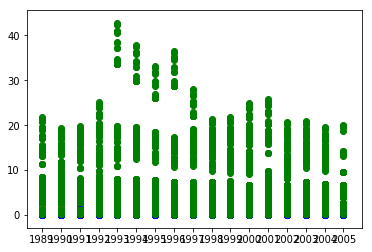

In [13]:
for ano in years:
    for year in anos1:
        for pais in agri_idx.index:
            if pais in land_agri_idx.index:

                if pais in ocde:
                    plt.scatter(ano, (agri_idx.loc[pais, ano] / land_agri_idx.loc[pais,year]), color="blue")

                if pais in brics:
                    plt.scatter(ano, (agri_idx.loc[pais, ano] / land_agri_idx.loc[pais,year]), color="orange")


                if pais not in ocde:
                    if pais not in brics:
                        plt.scatter(ano, (agri_idx.loc[pais, ano] / land_agri_idx.loc[pais,year]), color="green")
                        
                        
plt.xlabel("Anos")
plt.ylabel("Dólares exportados de alta tecnologia")
plt.title("Exportação per capta de alta tecnologia: Membro do BRICS (laranja), Membros OCDE(azul), demais(verde)", pad=20)


plt.show()


grafico 1 evidencia uma enorme discrepancia no pib per capta dos paises que compoe a ocde em relação ao brics e o resto do mundo. Interessanta ressaltar que nos úlitmos anos percebe-se um desaceleração do crescimento do pib per capta por parte dos paises mais ricos enquanto que os membros dos brics e o mundo tiveram, nesse mesmo período de tempo, uma aceleração. Esse primeiro gráfico é fundamental para entender o objetivo desse estudo; que é calcado em atestar empiricamente se tal diferença de riqueza entre os países pode ser explicada pela produção agrícula e exportação de alta tecnologia

O gráfico 2 coloca lado a lado a importancia que  a agricultura tem em relação a exportação de alta tecnologia. Surpriendentemente, os membros dos BRICS lideram nesses dois quesitos. Entretanto, se faz necessário analisar esses dados por uma perspectiva relativa, tanto no tocante a tecnologia como agricultura.

o grafico 4 permite uma melhor analise dos dados, pois coloca os países em uma mesma escala quanto a sua população